In [2]:
# Graph Preprocess
import pickle
import scipy.sparse as spp
import numpy as np

In [3]:
# Graph NNs
import torch
import torch.nn as nn
import torch.nn.functional as F

import dgl
from dgl.nn import GraphConv

Using backend: pytorch


## Create a graph for DGL 

In [9]:
adjmat_path = r"/XXX/adjmat.bin"

In [10]:
with open(adjmat_path, 'rb') as f:
    adj_mat = pickle.load(f)

# Adjacency 
I = np.eye(adj_mat.shape[0])
adj_mat = adj_mat + I
adj_mat

IsADirectoryError: [Errno 21] Is a directory: '/data/nkitamura/SoundSpaces/data/glove_data'

In [6]:
adj_mat = spp.coo_matrix(adj_mat)
g = dgl.DGLGraph(adj_mat)

dgl.save_graphs('KG.dgl', g)

/data/nkitamura/anaconda3/envs/dgl/lib/python3.6/site-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


## Processing a graph with GCN

In [7]:
class GCN(nn.Module):
    def __init__(self, in_feats, o_feats, num_nodes):
        super(GCN, self).__init__()
        self.num_nodes = num_nodes
        self.conv1 = GraphConv(in_feats, in_feats)
        self.conv2 = GraphConv(in_feats, in_feats)
        self.conv3 = GraphConv(in_feats, o_feats)
        self.final_mapping = nn.Linear(num_nodes, 512)


    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)
        h = F.relu(h)
        h = self.conv3(g, h)
        o = F.relu(h)
        o = o.view(1, self.num_nodes)
        o = self.final_mapping(o)
        
        return o

In [8]:
graph_list, _ = dgl.load_graphs('KG.dgl')
g = graph_list[0]
print(g)

joint_rep = torch.rand(45, 1024)

Graph(num_nodes=45, num_edges=653,
      ndata_schemes={}
      edata_schemes={})


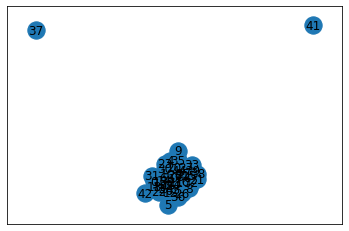

In [9]:
import networkx as nx
g_nx = g.to_networkx()
nx.draw_networkx(g_nx)

In [10]:
model = GCN(1024, 1, g.num_nodes())
out = model(g, joint_rep)
out.shape

torch.Size([1, 512])

In [23]:
model

GCN(
  (conv1): GraphConv(in=1024, out=1024, normalization=both, activation=None)
  (conv2): GraphConv(in=1024, out=1024, normalization=both, activation=None)
  (conv3): GraphConv(in=1024, out=1, normalization=both, activation=None)
  (final_mapping): Linear(in_features=45, out_features=512, bias=True)
)

In [25]:
embeddings_path = r"../data/glove_data/glove_embeddings_300d.bin"
with open(embeddings_path, 'rb') as f:
    emb = pickle.load(f)

In [35]:
len(emb.keys())

21

In [34]:
emb_tensor = list()
for k,v in emb.items():
    emb_tensor.append(v)
emb_tensor = np.array(emb_tensor)
emb_tensor.shape

(21, 300)

In [33]:
a

[[1, 2, 3]]

In [12]:
embeddings_path = r"../data/glove_data/glove_embeddings_300d.bin"



In [16]:
objects_vector == regions_vector

False

In [17]:
regions_vector

{'balcony': [1.0298,
  -0.29622,
  -0.13622,
  -0.2841,
  -0.041617,
  0.07737,
  0.029857,
  -0.30986,
  -0.48156,
  1.3974,
  0.41704,
  -0.17767,
  -0.18674,
  0.044145,
  0.076294,
  0.43052,
  -0.019703,
  1.3665,
  0.031945,
  0.19069,
  -0.48745,
  0.5506,
  0.29245,
  0.022086,
  -0.21904,
  -0.90703,
  -0.066817,
  -0.020761,
  -0.28524,
  0.18568,
  0.37084,
  0.28323,
  -0.36161,
  0.17907,
  -0.0095503,
  -0.54071,
  -0.097589,
  -0.31005,
  -0.51056,
  -0.49952,
  0.090253,
  -0.25026,
  -0.31819,
  -0.0042054,
  -0.48287,
  0.97876,
  -0.31407,
  -0.27748,
  -0.20686,
  0.6037,
  -0.23372,
  -0.29081,
  0.29125,
  0.69875,
  -0.013335,
  -0.53757,
  -0.080266,
  -0.14314,
  -0.54866,
  0.75946,
  -0.071855,
  0.2182,
  -0.044829,
  -0.11397,
  -0.28504,
  0.62655,
  0.052422,
  -0.14662,
  -0.1493,
  0.72945,
  0.081535,
  0.2359,
  0.012472,
  0.013811,
  0.17187,
  -0.32033,
  0.2221,
  0.020649,
  0.073497,
  0.21878,
  -0.29254,
  0.41827,
  0.31023,
  0.54872,
  -0.1